In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dict_dtype = {'Item_Number':str,
'Bottle_Volume (ml)':int,
'Bottles_Sold':int,
'Bottle_Retail':float,
'Store_Number':int}

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
products = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\clustering_data_num_unique_stores',dtype=dict_dtype, index_col=0)

In [6]:
products.rename({'Store_Number':'Num_Stores_Selling'} ,axis=1, inplace=True)
              

In [7]:
products2 = products.copy()

In [8]:
products.describe()

,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling
count,4475.000000,4475.000000,4.475000e+03,4475.000000
mean,792.361564,31.221806,6.930340e+03,125.248045
std,410.724957,69.350753,3.972229e+04,214.229508
min,20.000000,0.990000,1.000000e+00,1.000000
25%,750.000000,11.799501,5.250000e+01,3.000000
50%,750.000000,20.250000,5.470000e+02,49.000000
75%,750.000000,35.000000,3.622000e+03,154.000000
max,5250.000000,2963.694000,2.105088e+06,1725.000000


In [9]:
products.shape

(4475, 6)

<AxesSubplot:xlabel='Bottle_Retail', ylabel='Count'>

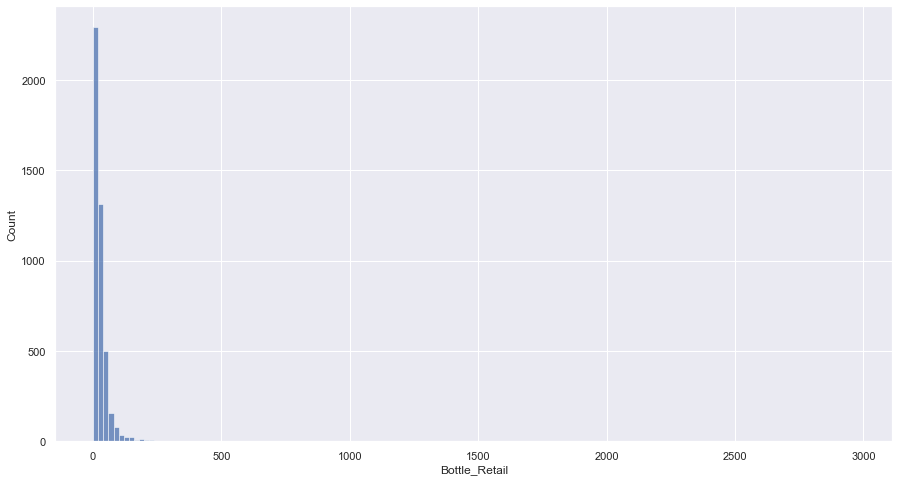

In [10]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(products['Bottle_Retail'], bins=150)


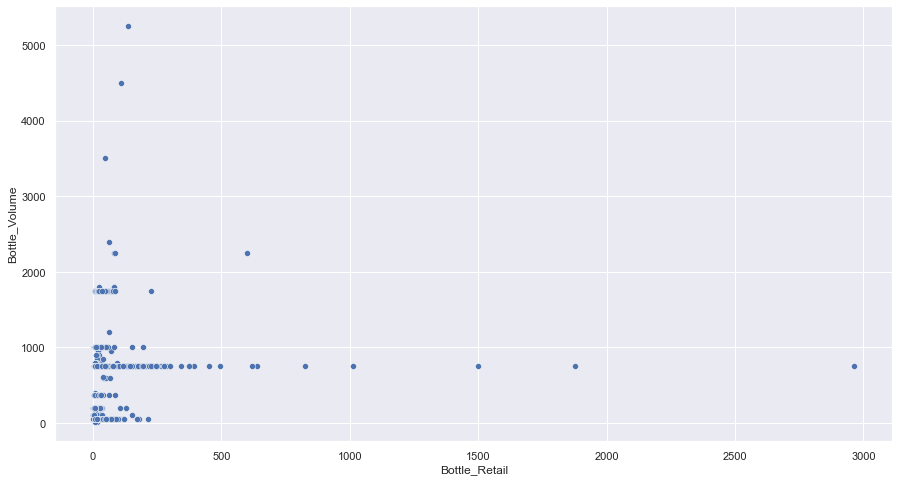

In [11]:
# products.plot.scatter(x='Bottle_Volume', y='Bottle_Retail')
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottle_Volume')
# gfg.set_ylim(0, 80)
# gph.set_xlim(0.98,3000)
# gph.set_xticks(range(0.98,3000))
plt.show()

In [12]:
products.Bottle_Retail.corr((products.Bottle_Volume))

0.012858551897243728

In [13]:
products.Bottle_Retail.corr((products.Bottles_Sold))

-0.04408941079679311

In [14]:
products.Bottles_Sold.corr((products.Bottle_Volume))

-0.000152168220141047

In [15]:
products.Bottles_Sold.corr((products.Num_Stores_Selling))

0.45378226327407434

In [16]:
filt = products.Bottle_Retail > 1400
products[filt]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling
1636,48725,Remy Martin Louis XIII,750,2963.694,17,12
3330,917673,HA Double Eagle Very Rare,750,1500.000,2,2
3367,919976,HA OFC Bourbon 1995,750,1875.000,10,10


In [17]:
filt2 = products.Bottle_Volume > 3000
products[filt2]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling
0,100015,Fireball Cinnamon Whiskey Bag in Box,3500,45.0,1123,129
139,101515,Fireball Cinnamon Whiskey Keg,5250,138.0,180,141
155,101665,Stumpys Spirits Cocktail Collection Gift Set,4500,108.0,115,26


In [18]:
np.sum(products.Bottles_Sold)

31013272

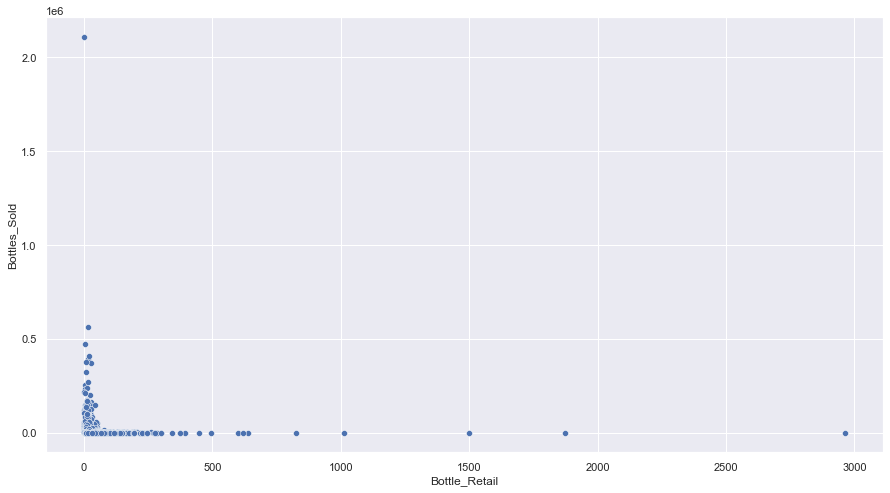

In [19]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottles_Sold')
# gfg.set_ylim(0, 80)

remove outliers

In [20]:
filt = products2.Bottle_Retail > 1400 #drop outliers of Bottle Retail

In [21]:
products2[filt]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling
1636,48725,Remy Martin Louis XIII,750,2963.694,17,12
3330,917673,HA Double Eagle Very Rare,750,1500.000,2,2
3367,919976,HA OFC Bourbon 1995,750,1875.000,10,10


In [22]:

products2 = products2[~filt]

In [23]:
products2.shape

(4472, 6)

In [24]:
filt2 = products2.Bottle_Volume > 3000 #drop outliers of Bottle Volume

In [25]:
products2 = products2[~filt2] 

In [26]:
products2.shape

(4469, 6)

In [27]:
filt3= products2.Item_Number == '64870'  #outlier of bottles sold

In [28]:
products2[filt3]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling
2035,64870,Fireball Cinnamon Whiskey,100,1.35,2105088,893


In [29]:
# products2[filt3]


products2 = products2[~filt3]

scale data for clustering

In [30]:
products2.shape

(4468, 6)

In [31]:
# cols_to_scale = ['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']

In [32]:
scaler = StandardScaler()

In [33]:


products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]] = scaler.fit_transform\
                                           (products2[['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']])
                                                   

products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled']].describe()

,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled
count,4.468000e+03,4.468000e+03,4.468000e+03
mean,-8.281946e-16,2.062768e-16,-3.488829e-16
std,1.000112e+00,1.000112e+00,1.000112e+00
min,-1.927429e+00,-7.107662e-01,-2.653216e-01
25%,-1.003907e-01,-4.443961e-01,-2.631887e-01
50%,-1.003907e-01,-2.353852e-01,-2.428858e-01
75%,-1.003907e-01,1.286786e-01,-1.167102e-01
max,4.029217e+00,2.425562e+01,2.283733e+01


In [34]:
# model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


determine optimal number of clusters

In [35]:
from sklearn.metrics import silhouette_score

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]

df_scaled = products2[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.6347448337966839
number of clusters =  3   silhouette score =  0.6192243931543716
number of clusters =  4   silhouette score =  0.6484011905716772
number of clusters =  5   silhouette score =  0.5880350303869514
number of clusters =  6   silhouette score =  0.6008967191451831
number of clusters =  7   silhouette score =  0.616562588496504
number of clusters =  8   silhouette score =  0.5152619179014546
number of clusters =  9   silhouette score =  0.5431903341632317
number of clusters =  10   silhouette score =  0.4975226872916802


In [36]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

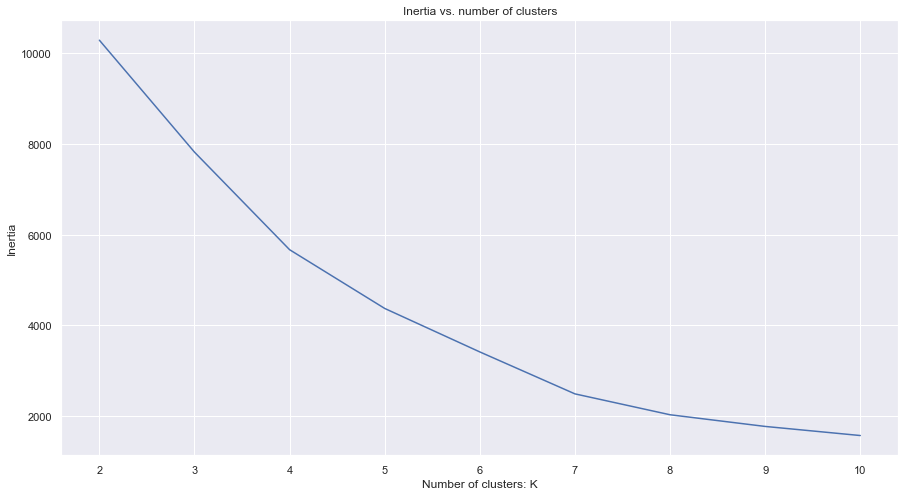

In [37]:

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

get four clusters

In [38]:


cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


model = KMeans(n_clusters=4, random_state=42)

model.fit(products2[cluster_cols])

products2['product_cluster'] = model.predict(products2[cluster_cols])

In [39]:
products2.head()

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,product_cluster
1,10006,Scoresby Rare Scotch,750,7.70,4619,197,-0.100391,-0.545148,-0.075909,1
2,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,136,-0.100391,-0.348183,-0.155481,1
3,10008,Scoresby Rare Scotch,1750,15.75,12340,287,2.402402,-0.346456,0.240775,0
4,10009,Scoresby Rare Scotch,1000,10.11,1722,70,0.525307,-0.485664,-0.194733,1
5,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,120,-0.100391,0.286398,-0.240507,1


In [40]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4468 entries, 1 to 4474
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Number           4468 non-null   object 
 1   Item_Description      4468 non-null   object 
 2   Bottle_Volume         4468 non-null   int64  
 3   Bottle_Retail         4468 non-null   float64
 4   Bottles_Sold          4468 non-null   int32  
 5   Num_Stores_Selling    4468 non-null   int32  
 6   Bottle_Volume_scaled  4468 non-null   float64
 7   Bottle_Retail_scaled  4468 non-null   float64
 8   Bottles_Sold_scaled   4468 non-null   float64
 9   product_cluster       4468 non-null   int32  
dtypes: float64(4), int32(3), int64(1), object(2)
memory usage: 331.6+ KB


In [41]:
products2['Bottle_Volume_liters'] = products2.Bottle_Volume / 1000

In [42]:
prod_dict = {0:'Volume_For_Dollar', 1:'Everything_Else', 2:'Popular_Bottles',3:'High End'}

In [43]:
products2[['product_cluster']].apply(lambda p: prod_dict[p[0]],axis=1)

1         Everything_Else
2         Everything_Else
3       Volume_For_Dollar
4         Everything_Else
5         Everything_Else
              ...        
4470      Everything_Else
4471      Everything_Else
4472      Everything_Else
4473      Everything_Else
4474      Everything_Else
Length: 4468, dtype: object

Name Product Clusters

In [44]:
products2['cluster_name'] = products2['product_cluster'].apply(lambda p: prod_dict[p])

In [45]:
products2.cluster_name

1         Everything_Else
2         Everything_Else
3       Volume_For_Dollar
4         Everything_Else
5         Everything_Else
              ...        
4470      Everything_Else
4471      Everything_Else
4472      Everything_Else
4473      Everything_Else
4474      Everything_Else
Name: cluster_name, Length: 4468, dtype: object

In [46]:
products2.groupby(['cluster_name']).agg({'Bottle_Volume_liters' : 'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean' })

,Bottle_Volume_liters,Bottle_Retail,Bottles_Sold
cluster_name,,,
Everything_Else,0.679009,26.228041,3891.036740
High End,0.728333,227.729191,113.788889
Popular_Bottles,0.791935,13.196858,162947.677419
Volume_For_Dollar,1.754324,23.062809,8325.682927


In [47]:
products2.groupby(['cluster_name']).agg({'Bottle_Volume' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

Bottle_Volume                                         \
                            min   max         std  median         mean   
cluster_name                                                             
Everything_Else              20  1200  241.484370   750.0   679.008538   
High End                     50  2250  268.898084   750.0   728.333333   
Popular_Bottles              50  1750  465.946379   750.0   791.935484   
Volume_For_Dollar          1750  2400   45.437839  1750.0  1754.323725   

                  Bottle_Retail                                                \
                            min          max         std   median        mean   
cluster_name                                                                    
Everything_Else          0.9900   124.500000   20.602354   20.280   26.228041   
High End               126.8225  1012.500000  148.775955  180.825  227.729191   
Popular_Bottles          1.3400    41.522231    8.944001   11.875   13.196858   
Volume_For_Dollar        7.3400    87.247228   15.375119   17.250   23.062809   

                  Bottles_Sold                                                  
                           min     max            std    median           mean  
cluster_name                                                                    
Everything_Else              1   81229    9438.204236     450.0    3891.036740  
High End                     1    2319     317.416343      21.0     113.788889  
Popular_Bottles          83533  563260  103539.974854  126979.5  162947.677419  
Volume_For_Dollar            3   92169   15543.193181    2035.0    8325.682927

In [48]:
products2.groupby(['cluster_name']).agg({'Bottle_Volume_liters' :['min','max', 'mean'], 'Bottle_Retail':['min','max', 'mean'],'Bottles_Sold':['min','max', 'mean'] })

Bottle_Volume_liters                 Bottle_Retail  \
                                   min   max      mean           min   
cluster_name                                                           
Everything_Else                   0.02  1.20  0.679009        0.9900   
High End                          0.05  2.25  0.728333      126.8225   
Popular_Bottles                   0.05  1.75  0.791935        1.3400   
Volume_For_Dollar                 1.75  2.40  1.754324        7.3400   

                                           Bottles_Sold                         
                           max        mean          min     max           mean  
cluster_name                                                                    
Everything_Else     124.500000   26.228041            1   81229    3891.036740  
High End           1012.500000  227.729191            1    2319     113.788889  
Popular_Bottles      41.522231   13.196858        83533  563260  162947.677419  
Volume_For_Dollar    87.247228   23.062809            3   92169    8325.682927

In [49]:
products2['price_per_ml'] = products2['Bottle_Retail'] / products2['Bottle_Volume']

In [50]:
products2.groupby(['cluster_name']).agg({'Bottle_Volume':'nunique'})

,Bottle_Volume
cluster_name,
Everything_Else,17
High End,7
Popular_Bottles,7
Volume_For_Dollar,4


In [51]:
products2['revenue'] = products2.Bottles_Sold * products2.Bottle_Retail


In [52]:
df = products2.groupby(['cluster_name']).agg({'revenue':'sum'})
df.style.format("{:.0f}")


,revenue
cluster_name,
Everything_Else,215832580
High End,1848272
Popular_Bottles,133474291
Volume_For_Dollar,70738366


In [53]:
from freq_pd import proc_freq

In [54]:
proc_freq(products2,'cluster_name')

,cluster_name,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,Everything_Else,3865,86.50,3865,86.50
1,High End,90,2.01,3955,88.52
2,Popular_Bottles,62,1.39,4017,89.91
3,Volume_For_Dollar,451,10.09,4468,100.00


In [62]:
products2.groupby(['cluster_name']).agg({'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

price_per_ml                                          \
                           min       max       std    median      mean   
cluster_name                                                             
Everything_Else       0.003200  2.433600  0.181708  0.031987  0.069577   
High End              0.128566  4.314600  0.670111  0.249993  0.447655   
Popular_Bottles       0.003630  0.129000  0.018665  0.016393  0.020533   
Volume_For_Dollar     0.004194  0.049856  0.008527  0.009857  0.013095   

                  Bottles_Sold                                   \
                           min     max            std    median   
cluster_name                                                      
Everything_Else              1   81229    9438.204236     450.0   
High End                     1    2319     317.416343      21.0   
Popular_Bottles          83533  563260  103539.974854  126979.5   
Volume_For_Dollar            3   92169   15543.193181    2035.0   

                                 Num_Stores_Selling                           \
                            mean                min   max         std median   
cluster_name                                                                   
Everything_Else      3891.036740                  1  1551  181.311441   44.0   
High End              113.788889                  1   212   43.502551    5.5   
Popular_Bottles    162947.677419                  4  1725  540.791328  957.5   
Volume_For_Dollar    8325.682927                  1  1199  192.526194   79.0   

                               
                         mean  
cluster_name                   
Everything_Else    111.155239  
High End            30.000000  
Popular_Bottles    939.048387  
Volume_For_Dollar  152.407982

In [65]:
products2.groupby(['cluster_name']).agg({'revenue':['sum'],'Bottle_Volume':['nunique','min','max','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

revenue Bottle_Volume                      \
                            sum       nunique   min   max  median   
cluster_name                                                        
Everything_Else    2.158326e+08            17    20  1200   750.0   
High End           1.848272e+06             7    50  2250   750.0   
Popular_Bottles    1.334743e+08             7    50  1750   750.0   
Volume_For_Dollar  7.073837e+07             4  1750  2400  1750.0   

                  price_per_ml                                          \
                           min       max       std    median      mean   
cluster_name                                                             
Everything_Else       0.003200  2.433600  0.181708  0.031987  0.069577   
High End              0.128566  4.314600  0.670111  0.249993  0.447655   
Popular_Bottles       0.003630  0.129000  0.018665  0.016393  0.020533   
Volume_For_Dollar     0.004194  0.049856  0.008527  0.009857  0.013095   

                  Bottles_Sold                                   \
                           min     max            std    median   
cluster_name                                                      
Everything_Else              1   81229    9438.204236     450.0   
High End                     1    2319     317.416343      21.0   
Popular_Bottles          83533  563260  103539.974854  126979.5   
Volume_For_Dollar            3   92169   15543.193181    2035.0   

                                 Num_Stores_Selling                           \
                            mean                min   max         std median   
cluster_name                                                                   
Everything_Else      3891.036740                  1  1551  181.311441   44.0   
High End              113.788889                  1   212   43.502551    5.5   
Popular_Bottles    162947.677419                  4  1725  540.791328  957.5   
Volume_For_Dollar    8325.682927                  1  1199  192.526194   79.0   

                               
                         mean  
cluster_name                   
Everything_Else    111.155239  
High End            30.000000  
Popular_Bottles    939.048387  
Volume_For_Dollar  152.407982

In [68]:
pd.set_option('display.max_columns', None)
products2.groupby(['cluster_name']).agg({'Item_Number':['nunique'],'revenue':['sum'],'Bottle_Volume':['count','nunique','min','max','median','std'],'Bottle_Retail':['min','max','std', 'median', 'mean'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

Item_Number       revenue Bottle_Volume                      \
                      nunique           sum         count nunique   min   max   
cluster_name                                                                    
Everything_Else          3862  2.158326e+08          3865      17    20  1200   
High End                   90  1.848272e+06            90       7    50  2250   
Popular_Bottles            62  1.334743e+08            62       7    50  1750   
Volume_For_Dollar         451  7.073837e+07           451       4  1750  2400   

                                      Bottle_Retail                           \
                   median         std           min          max         std   
cluster_name                                                                   
Everything_Else     750.0  241.484370        0.9900   124.500000   20.602354   
High End            750.0  268.898084      126.8225  1012.500000  148.775955   
Popular_Bottles     750.0  465.946379        1.3400    41.522231    8.944001   
Volume_For_Dollar  1750.0   45.437839        7.3400    87.247228   15.375119   

                                       price_per_ml                      \
                    median        mean          min       max       std   
cluster_name                                                              
Everything_Else     20.280   26.228041     0.003200  2.433600  0.181708   
High End           180.825  227.729191     0.128566  4.314600  0.670111   
Popular_Bottles     11.875   13.196858     0.003630  0.129000  0.018665   
Volume_For_Dollar   17.250   23.062809     0.004194  0.049856  0.008527   

                                      Bottles_Sold                         \
                     median      mean          min     max            std   
cluster_name                                                                
Everything_Else    0.031987  0.069577            1   81229    9438.204236   
High End           0.249993  0.447655            1    2319     317.416343   
Popular_Bottles    0.016393  0.020533        83533  563260  103539.974854   
Volume_For_Dollar  0.009857  0.013095            3   92169   15543.193181   

                                           Num_Stores_Selling        \
                     median           mean                min   max   
cluster_name                                                          
Everything_Else       450.0    3891.036740                  1  1551   
High End               21.0     113.788889                  1   212   
Popular_Bottles    126979.5  162947.677419                  4  1725   
Volume_For_Dollar    2035.0    8325.682927                  1  1199   

                                                  
                          std median        mean  
cluster_name                                      
Everything_Else    181.311441   44.0  111.155239  
High End            43.502551    5.5   30.000000  
Popular_Bottles    540.791328  957.5  939.048387  
Volume_For_Dollar  192.526194   79.0  152.407982

In [66]:
products2.cluster_name.value_counts()

Everything_Else      3865
Volume_For_Dollar     451
High End               90
Popular_Bottles        62
Name: cluster_name, dtype: int64

In [76]:
# df.sort_values(by=['Population'], ascending=False)
products2.sort_values(by=['revenue'], ascending=False)
products2[['cluster_name','revenue','Item_Description','Bottle_Retail','Bottle_Volume']].sort_values(by=['revenue'], ascending=False)
# products2.style.format("{:.0f}")


,cluster_name,revenue,Item_Description,Bottle_Retail,Bottle_Volume
1205,Popular_Bottles,1.062280e+07,Titos Handmade Vodka,28.500000,1750
214,Popular_Bottles,8.831917e+06,Black Velvet,15.680000,1750
1204,Popular_Bottles,7.720284e+06,Titos Handmade Vodka,19.010000,1000
2772,Popular_Bottles,6.011879e+06,Patron Silver,41.522231,750
1203,Popular_Bottles,5.890845e+06,Titos Handmade Vodka,15.000000,750
...,...,...,...,...,...
1249,Everything_Else,3.150000e+01,Devil''s Spring Vodka,6.300000,375
1120,Everything_Else,3.000000e+01,Y-not Vodka,15.000000,750
2235,Everything_Else,1.626000e+01,Bols Melon,8.130000,750
4245,Everything_Else,1.176000e+01,SOOH Margaritaville Silver Tequila,11.760000,1000


In [58]:
products2.loc[products2.product_cluster==3,:]['Bottle_Retail'].max()

1012.5

In [59]:
# products2.loc[products2.product_cluster==1,:]

In [63]:
products_out=products2[['Item_Number','Item_Description','Bottle_Volume','Bottle_Retail', 'Bottles_Sold','cluster_name','revenue','Num_Stores_Selling']]

In [64]:
products_out.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\product_clusters.csv')